## PhD Workshop Session 1 Extension: Enzyme Kinetics Data Processing with Python Part II

In this session, we will be processing similar data as the previous exercise, but this time for a different experiment.

We will be using a spreadsheet with the fluorescence measurements (RFU) from a 96-well plate laid out as below:

|  | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| A | 10 | 10 | 10 | 10 | 0.39 | 0.39 | 0.39 | 0.39 | 10 | 10 | 10 | 10 |
| B | 6.67 | 6.67 | 6.67 | 6.67 | 0.26 | 0.26 | 0.26 | 0.26 | 5 | 5 | 5 | 5 |
| C | 4.44 | 4.44 | 4.44 | 4.44 | 0.17 | 0.17 | 0.17 | 0.17 | 2.5 | 2.5 | 2.5 | 2.5 |
| D | 2.96 | 2.96 | 2.96 | 2.96 | 0.12 | 0.12 | 0.12 | 0.12 | 1.25 | 1.25 | 1.25 | 1.25 |
| E | 1.98 | 1.98 | 1.98 | 1.98 | 0.08 | 0.08 | 0.08 | 0.08 | 0.625 | 0.625 | 0.625 | 0.625 |
| F | 1.32 | 1.32 | 1.32 | 1.32 | 0.05 | 0.05 | 0.05 | 0.05 | 0.3125 | 0.3125 | 0.3125 | 0.3125 |
| G | 0.88 | 0.88 | 0.88 | 0.88 | 0.03 | 0.03 | 0.03 | 0.03 | 0.156 | 0.156 | 0.156 | 0.156 |
| H | 0.59 | 0.59 | 0.59 | 0.59 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |

At the end of this notebook, we will have produced a plot of turnover [$min^{-1}$] vs concentration of 4MU [$\mu M$]. However, this time you will be completing the blank spaces in the code to do this yourself :)

### Step 1: Importing the data

In [1]:
file_name = './session1_data2.xlsx'

# We will be using a library called pandas to handle the data.
import pandas as pd

# The next few lines import the data and convert it into a convenient form for us
# Don't worry about the specifics, just know that pandas is useful for formatting data
df_input = pd.read_excel(
    io=file_name,
    sheet_name="Table All Cycles",
    skiprows=[0,1,2,3,4,5,6,7,8,10],
    header=0,
    usecols="B:CT",
    index_col=0
)

# This spreadsheet has the time column set up differently, just leave the next few lines as-is
df_input.index.rename("Time_min", inplace=True)
df_input.head() # this prints just the first 5 lines for us to see

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
Time_min,,,,,,,,,,,,,,,,,,,,,
0,2193797,2335038,2821805,2677438,2230747,1983191,2222435,2173249,11088438,11116024,...,2075308,2275594,2150849,2090369,2005478,2096846,9464,8870,8558,9727
1,2434350,2598754,3184436,3017081,2273567,1974879,2244930,2205890,10851608,10914180,...,2058206,2324890,2121431,2063885,1967189,2067363,9187,8675,8542,9861
2,2658199,2916364,3456699,3340274,2357899,1963232,2271174,2227061,10750237,10855196,...,2035726,2366673,2084849,2027798,5490842,2034658,9226,8811,8527,9723
3,2884584,3095254,3786826,3620192,2354055,1964828,2297928,2266867,10759207,10812136,...,2023937,2399347,2048953,2003101,1906820,2006595,9240,8729,8473,9757
4,3105289,3417172,4098340,3933724,2394289,1957314,2322673,2276503,10688562,10775356,...,2011206,2437270,2024113,1976442,1874976,1984372,9315,8763,8480,9680


Now we have a `pandas DataFrame` containing the fluorescence measurement in each well for each time point.

### Step 2: Standard dilution 4MU

We need to get the the slope and intercept of the RFU vs concentration for the 4MU standard. 

Let's first extract this data from our DataFrame and the plate layout. We know the 4MU standard wells are in columns 4-6 on the plate. 

In [2]:
# Define the concentration of 4MU in each of the wells in columns 9-12
standard_conc_dict = {
    "A": 10,
    "B": 5,
    "C": 2.5,
    "D": 1.25,
    "E": 0.625,
    "F": 0.3125,
    "G": 0.15625,
    "H": 0,
}

# Define a list of wells and their concentrations we want to use in this section (A-H 9-12)
standard_wells = []
conc_list = []
for well in list(df_input.keys()):
    if int(well[1:]) > 8: # selects only wells which are in columns 9-12
        standard_wells.append(well)

# Extract the data we want from the raw data
df_standards = df_input[standard_wells]
df_standards = df_standards.melt(ignore_index=False, var_name="Well", value_name="RFU")

# Add the concentration column
df_standards["Concentration"] = [standard_conc_dict[well[0]] for well in df_standards.Well]

df_standards


,Well,RFU,Concentration
Time_min,,,
0,A09,11088438,10.0
1,A09,10851608,10.0
2,A09,10750237,10.0
3,A09,10759207,10.0
4,A09,10688562,10.0
...,...,...,...
85,H12,9242,0.0
86,H12,9295,0.0
87,H12,9313,0.0


We now want to plot the average RFU at the last timepoint for each concentration, and find the slope and intercept of the line of best fit.

In [3]:
# Select the last timepoint 
last_timepoint = df_standards[df_standards.index == df_standards.index.max()]
last_timepoint

,Well,RFU,Concentration
Time_min,,,
89,A09,10622178,10.00000
89,A10,10629578,10.00000
89,A11,9420530,10.00000
89,A12,11567482,10.00000
89,B09,5570234,5.00000
89,B10,5533230,5.00000
89,B11,5367492,5.00000
89,B12,6282521,5.00000
89,C09,2881329,2.50000


There was something wrong with the experiment, we want to ignore the values where concentration = 10 $\mu M$. Let's do that now

In [4]:
last_timepoint = last_timepoint[last_timepoint.Concentration < 10]
last_timepoint

,Well,RFU,Concentration
Time_min,,,
89,B09,5570234,5.00000
89,B10,5533230,5.00000
89,B11,5367492,5.00000
89,B12,6282521,5.00000
89,C09,2881329,2.50000
89,C10,2854160,2.50000
89,C11,2779830,2.50000
89,C12,3445761,2.50000
89,D09,1484377,1.25000


Line of best fit is y = 1139263.544862156 * x + 53528.49718045131


Text(0.5, 1.0, 'y = 1139263.544862156 * x + 53528.49718045131')

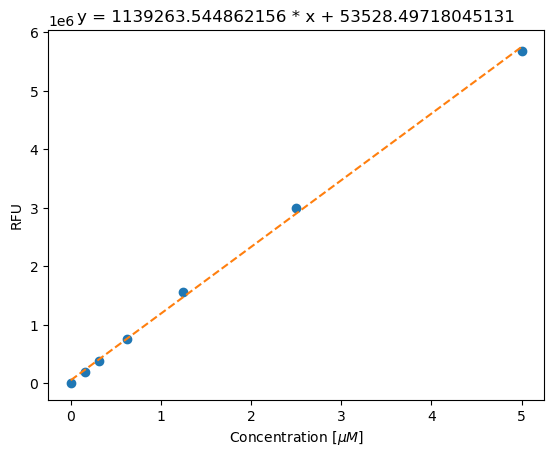

In [5]:
# Fit a line of best fit with least squares with numpy
import numpy as np

# Find the mean of replicates in each concentration
x = []
y = []
for concentration in set(last_timepoint.Concentration):
    x.append(concentration)
    y.append(last_timepoint[last_timepoint.Concentration == concentration].RFU.mean())

# Fit a 1d polynomial (line of best fit) by least squares
slope, intercept = np.polyfit(x, y, 1)
print(f"Line of best fit is y = {slope} * x + {intercept}")

# Plot the line of best fit to check
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, y, "o")  # Original data points
x_points = np.linspace(0, max(x))
y_points = slope * x_points + intercept
plt.plot(x_points, y_points, "--")  # Line of best fit
plt.xlabel("Concentration [$\mu M$]")
plt.ylabel("RFU")
plt.title(f"y = {slope} * x + {intercept}")

### Step 3: Calculating turnover rate for 4MUg substrate dilution

Now that we have the slope and intercept for 4MU, let's now calculate the concentration of K5 produced in the assay.

Like before, we need to extract the K5 wells from the raw data. 

In [6]:
# Define the concentration of 4MU in each of the wells in columns 4-6
conc_K5_1to4_dict = {
    "A": 10,
    "B": 6.67,
    "C": 4.44,
    "D": 2.96,
    "E": 1.98,
    "F": 1.32,
    "G": 0.88,
    "H": 0.59,
}

conc_K5_5to8_dict = {
    "A": 0.39,
    "B": 0.26,
    "C": 0.17,
    "D": 0.12,
    "E": 0.08,
    "F": 0.05,
    "G": 0.03,
    "H": 0,
}

# Define a list of wells and their concentrations we want to use in this section (A-H 1-8)
wells_K5 = []
conc_list = []
for well in list(df_input.keys()):
    if int(well[1:]) < 9: # selects only wells which are in columns 1-8
        wells_K5.append(well)

# Extract the data we want from the raw data
df_K5 = df_input[wells_K5]
df_K5 = df_K5.melt(ignore_index=False, var_name="Well", value_name="RFU")

# Add the concentration column
def get_conc(well):
    well_column = int(well[1:])
    well_row = well[0]
    if well_column < 5:
        conc = conc_K5_1to4_dict[well_row]
    elif well_column < 9:
        conc = conc_K5_5to8_dict[well_row]
    else:
        raise ValueError(f"Concentration not defined for {well}")
    return conc

df_K5["Concentration"] = [get_conc(well) for well in df_K5.Well]
df_K5


,Well,RFU,Concentration
Time_min,,,
0,A01,2193797,10.0
1,A01,2434350,10.0
2,A01,2658199,10.0
3,A01,2884584,10.0
4,A01,3105289,10.0
...,...,...,...
85,H08,1502853,0.0
86,H08,1498209,0.0
87,H08,1493535,0.0


We want to find the concentration of K5 at 5 mins

In [7]:
K5_5min = df_K5[df_K5.index == 5]
K5_5min

,Well,RFU,Concentration
Time_min,,,
5,A01,3321943,10.00
5,A02,3682764,10.00
5,A03,4406488,10.00
5,A04,4265645,10.00
5,A05,2424426,0.39
...,...,...,...
5,H04,2459861,0.59
5,H05,1994678,0.00
5,H06,1956580,0.00


We need to use the standards slope and intercept to determine the concentration of K5 produced at the 5 min mark.

For this, we will do the calculation:

$$[K5]_{t=5 mins} = \frac{RFU_{t=5 mins} - intercept}{slope}$$

In [8]:
# Over the first 5 mins
K5_5min = K5_5min.assign(Conc_K5_5min = (K5_5min["RFU"] - intercept) / slope)

# Concentration of 4MU produced per minute
K5_5min = K5_5min.assign(Conc_K5_1min = K5_5min["Conc_K5_5min"] / 5)

K5_5min

,Well,RFU,Concentration,Conc_K5_5min,Conc_K5_1min
Time_min,,,,,
5,A01,3321943,10.00,2.868884,0.573777
5,A02,3682764,10.00,3.185598,0.637120
5,A03,4406488,10.00,3.820854,0.764171
5,A04,4265645,10.00,3.697227,0.739445
5,A05,2424426,0.39,2.081079,0.416216
...,...,...,...,...,...
5,H04,2459861,0.59,2.112182,0.422436
5,H05,1994678,0.00,1.703863,0.340773
5,H06,1956580,0.00,1.670423,0.334085


Let's plot the results

Text(0, 0.5, 'Turnover rate [$min^{-1}$]')

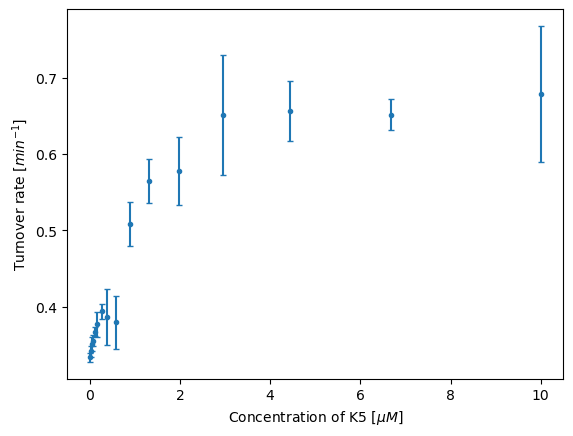

In [9]:
means = K5_5min.groupby(["Concentration"]).Conc_K5_1min.mean()
std = K5_5min.groupby(["Concentration"]).Conc_K5_1min.std()

plt.errorbar(
    x=means.keys(),
    y=means.values,
    yerr=std.values,
    linestyle="",
    marker=".",
    capsize=2
)

plt.xlabel("Concentration of K5 [$\mu M$]")
plt.ylabel("Turnover rate [$min^{-1}$]")

### Step 4: Finding $V_{max}$ and $k_m$

We need to fit a curve through the turnover vs. concentration data. We will use the mean turnover value for the three replicates in each concentration.

Text(0, 0.5, 'Turnover rate [$min^{-1}$]')

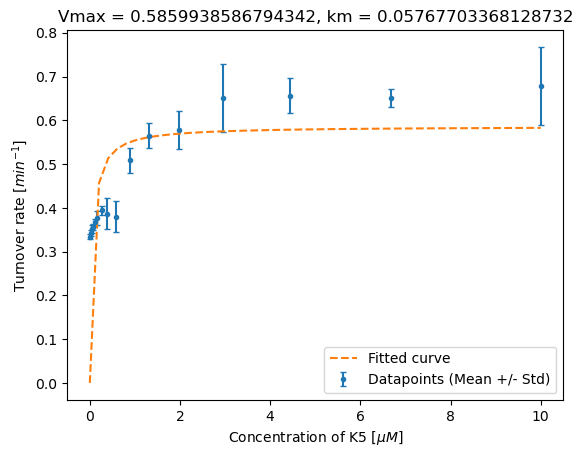

In [10]:
# Use scipy optimise to fit the curve
from scipy.optimize import curve_fit

# Define a function f to fit to the data
def f(x, vmax, km):
    return vmax * x / (km + x)

# Define x and y data to fit
x = means.keys()  # concentrations
y = means.values  # turnover rate [min-1]

# Fit the curve
popt, pcov = curve_fit(f, x, y)

# Plot results
# Error bar plot from previous cell
plt.errorbar(
    x=means.keys(),
    y=means.values,
    yerr=std.values,
    linestyle="",
    marker=".",
    capsize=2,
    label="Datapoints (Mean +/- Std)"
)

# Fitted curve
plt.plot(np.linspace(0,max(means.keys())), f(np.linspace(0,max(means.keys())), *popt), "--", label="Fitted curve")
plt.legend()

plt.title(f"Vmax = {popt[0]}, km = {popt[1]}")

plt.xlabel("Concentration of K5 [$\mu M$]")
plt.ylabel("Turnover rate [$min^{-1}$]")